# Microsoft Movie Dataset Analysis

# Overview
Microsoft is planning to open a new Movies Studio. There are opportunities available out there and we would like to know which movies are best in the interest of the business to create. This project analyzes the Movie datasets with a view to advise the stakeholders on types of movies to create and they can use the insights to make the best business decisions. This project will use descriptive analysis.

# Business Problem

Microsoft is planning to open a new Movies Studio. We would like to analyse information on the types of movies to be created which are in the best interest of the business. Business will use these insights on selecting the right type of movies to create. I would be analysing the datasets to find the folllowing information:

*Finding the best types of movies to creates
*Best release months in the year
*Ideal length of our movies 

# Data Understanding


We are using the IMDB datasets and The Numbers (TN) datasets for our analysis purpose- Titles, Ratings and Budgets. These datasets have records of related to each movie release with the information on their budgets, collections, genres, avarege ratings and more. 


In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# Reading the Data

Lets have a look at our files and the columns.

In [3]:
# reading the data
title=pd.read_csv('imdb.title.basics.csv.gz')
rating=pd.read_csv('imdb.title.ratings.csv.gz')
budget=pd.read_csv('tn.movie_budgets.csv.gz')


In [12]:
title.head(1)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"


In [42]:
title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [44]:
rating.head(1)

,tconst,averagerating,numvotes
0,tt10356526,8,31


In [45]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [11]:
budget.head(1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


In [46]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
 6   year               5782 non-null   object        
 7   month              5782 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 361.5+ KB


In [14]:
# updating the release date to date format and spliting the date into Months and Year columns.

budget["release_date"] = pd.to_datetime(budget["release_date"])
budget['year'] = budget['release_date'].apply(lambda x: str(x.year))
budget['month'] = budget['release_date'].apply(lambda x: str(x.month))

# Data Cleaning and Merging

Merging the titles and ratings data together to get the data of the movies which has an average ratings and genres information. Then merging the data with budget to get the data on movies with Gross Collection, Genre and Rating information in one dataset.

In [16]:
df4 = pd.merge(title, rating, how="inner", on=["tconst"])

In [17]:
df4.rename(columns={'primary_title': 'movie',"start_year":"year"}, inplace= True)

In [18]:
df4.head(1)

,tconst,movie,original_title,year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77


In [19]:
df4['genres'].isna().sum()

804

In [20]:
#Dropping the rows which does not have the Genre info to find the complete set of data.
df4.dropna(subset=['genres'], inplace=True)

In [21]:
df4.isna().sum()

tconst                0
movie                 0
original_title        0
year                  0
runtime_minutes    7332
genres                0
averagerating         0
numvotes              0
dtype: int64

In [22]:
# filling the runtime information with median values to prevent any data skewing.

df4['runtime_minutes']=df4['runtime_minutes'].fillna(df4['runtime_minutes'].median())

In [25]:
df4.describe()

,year,runtime_minutes,averagerating,numvotes
count,73052.000000,73052.000000,73052.000000,7.305200e+04
mean,2014.281430,94.357677,6.330930,3.562173e+03
std,2.615288,198.595006,1.474699,3.045804e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,83.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,5.000000e+01
75%,2017.000000,102.000000,7.400000,2.890000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [28]:
# merging the combined dataset with budget data to get the info on all the movie records where we have budget and gross collection information.

movie_analysis_df = pd.merge(df4, budget, how="inner", on=['movie'])


In [34]:
#Changing the columns format to analyse the data

movie_analysis_df.head(1)

,movie,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,year_y,month
0,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,2012-12-31,"$45,000,000",$0,"$73,706",2012,12


In [35]:
# Defining a function to remove currency symbol and delimiters from the string
def clean_currency(x):
 
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [ ]:
#changing the columns with $(currency), 1) removing the $ symbol and converting to Float to be able to apply maths functions

movie_analysis_df['production_budget'] = movie_analysis_df['production_budget'].apply(clean_currency).astype('float')
movie_analysis_df['domestic_gross'] = movie_analysis_df['domestic_gross'].apply(clean_currency).astype('float')
movie_analysis_df['worldwide_gross'] = movie_analysis_df['worldwide_gross'].apply(clean_currency).astype('float')

# adding the Gross Profit Worldwide columns 

movie_analysis_df['GP_ww']=movie_analysis_df["worldwide_gross"] - movie_analysis_df["production_budget"].round(2)

#to convert scientific notations back to float
pd.options.display.float_format = '{:.0f}'.format


In [38]:
#adding a column Release Month from the Release Date

movie_analysis_df['release_month'] = pd.to_datetime(movie_analysis_df['release_date'], format='%m').dt.month_name().str.slice(stop=3)

In [56]:
movie_analysis_df.head(1)

,movie,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,year_y,month,GP_ww,release_month,release_year
0,Foodfight!,91,Action,2,8248,2012-12-31,45000000,0,73706,2012,12,-44926294,Dec,2012


In [55]:
movie_analysis_df['release_year'] = movie_analysis_df['release_date'].apply(lambda x: str(x.year))

In [40]:
# spliting the column genre values into seperate rows for the purpose of analyses on genre.


movie_analysis_df=movie_analysis_df.assign(genres=movie_analysis_df.genres.str.split(",")).explode('genres')

In [58]:
#Now our merged data is ready for analysis.

movie_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6444 entries, 0 to 2866
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie              6444 non-null   object        
 1   runtime_minutes    6444 non-null   float64       
 2   genres             6444 non-null   object        
 3   averagerating      6444 non-null   float64       
 4   numvotes           6444 non-null   int64         
 5   release_date       6444 non-null   datetime64[ns]
 6   production_budget  6444 non-null   float64       
 7   domestic_gross     6444 non-null   float64       
 8   worldwide_gross    6444 non-null   float64       
 9   year_y             6444 non-null   object        
 10  month              6444 non-null   object        
 11  GP_ww              6444 non-null   float64       
 12  release_month      6444 non-null   object        
 13  release_year       6444 non-null   object        
dtypes: datet

In [57]:
movie_analysis_df.describe()

,runtime_minutes,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,GP_ww
count,6444,6444,6444,6444,6444,6444,6444
mean,104,6,80625,38200659,47572291,116463879,78263220
std,20,1,145579,51071054,79441529,216103596,179212669
min,3,2,5,1400,0,0,-200237650
25%,91,6,586,5000000,702594,3266052,-2300000
50%,102,6,21340,19500000,19487173,36146087,12938359
75%,115,7,93868,48000000,56445148,118763442,73417762
max,280,9,1841066,425000000,760507625,2776345279,2351345279


# Data Analysis

# Top genres with highest Worldwide Gross Profits.

Lets have a look at the genres with highest Worldwide Gross profit collection. 

In [123]:
moviedf=movie_analysis_df
moviedf.head(2)

,movie,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,year_y,month,GP_ww,release_month,release_year,movie_length
0,Foodfight!,91,Action,2,8248,2012-12-31,45000000,0,73706,2012,12,-44926294,Dec,2012,Short
0,Foodfight!,91,Animation,2,8248,2012-12-31,45000000,0,73706,2012,12,-44926294,Dec,2012,Short


In [68]:
top_genre=moviedf.groupby(['genres']).GP_ww.mean().sort_values(ascending=False)
top_genre.head(5)

genres
Animation   231740220
Adventure   208682977
Sci-Fi      175396180
Fantasy     145929293
Musical     138308584
Name: GP_ww, dtype: float64

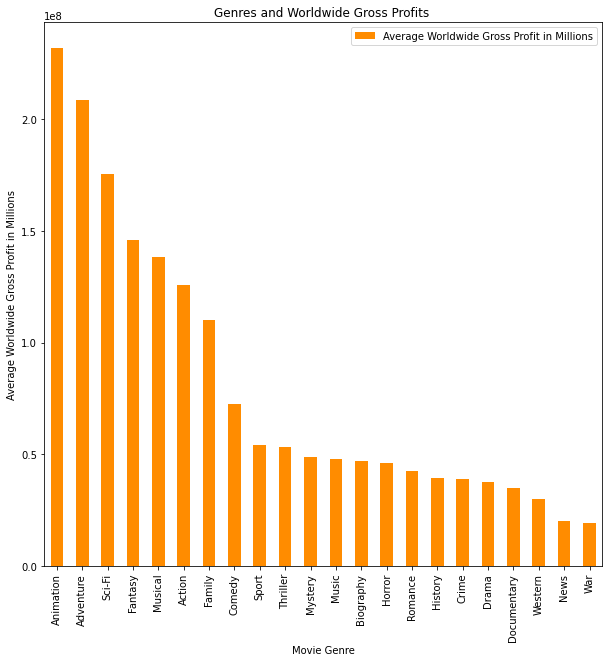

In [124]:
#Create Plot
ax=top_genre.plot(kind='bar',figsize=(10,10),title="Genres and Worldwide Gross Profits ",legend=True, color='darkorange')

#set titles for x-axis
ax.set_xlabel("Movie Genre")
#set title for y-axis
ax.set_ylabel("Average Worldwide Gross Profit in Millions")
#placing the legend to avoid overlap
plt.legend(["Average Worldwide Gross Profit in Millions"],loc="upper right")

plt.savefig("./images/Movie_genre.png", dpi=150)
plt.show()


# Movie length with highest gross profits and highest average ratings

Lets have a look at the runtime of the movies and compare this with the Gross Profit Collection and average ratings.

In [82]:
'''This function takes in a number of minutes and returns a descriptive string. 
    This is used to categorize movie length for further analysis.
    
    Less than 106 minutes: 'Short'
    106 to 139 minutes: 'Medium'
    More than 139 minutes: 'Long'
 '''
    
    
def runtime(minutes):
  
    if (minutes < 106):
        return 'Short'
    elif (minutes > 139):
        return 'Long'
    else:
        return 'Medium'

In [83]:
movie_analysis_df['movie_length']=movie_analysis_df['runtime_minutes'].apply(runtime)

movie_analysis_df

,movie,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,year_y,month,GP_ww,release_month,release_year,movie_length
0,Foodfight!,91,Action,2,8248,2012-12-31,45000000,0,73706,2012,12,-44926294,Dec,2012,Short
0,Foodfight!,91,Animation,2,8248,2012-12-31,45000000,0,73706,2012,12,-44926294,Dec,2012,Short
0,Foodfight!,91,Comedy,2,8248,2012-12-31,45000000,0,73706,2012,12,-44926294,Dec,2012,Short
1,On the Road,124,Adventure,6,37886,2013-03-22,25000000,720828,9313302,2013,3,-15686698,Mar,2013,Medium
1,On the Road,124,Drama,6,37886,2013-03-22,25000000,720828,9313302,2013,3,-15686698,Mar,2013,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2863,Heroes,88,Documentary,7,7,2008-10-24,400000,655538,655538,2008,10,255538,Oct,2008,Short
2864,Push,92,Documentary,7,33,2009-02-06,38000000,31811527,49678401,2009,2,11678401,Feb,2009,Short
2865,Unplanned,106,Biography,6,5945,2019-03-29,6000000,18107621,18107621,2019,3,12107621,Mar,2019,Medium
2865,Unplanned,106,Drama,6,5945,2019-03-29,6000000,18107621,18107621,2019,3,12107621,Mar,2019,Medium


In [84]:
movie_length_pref=movie_analysis_df.groupby(['movie_length']).GP_ww.mean().sort_values(ascending=False)
movie_length_pref

movie_length
Long     219767345
Medium    97511647
Short     53364225
Name: GP_ww, dtype: float64

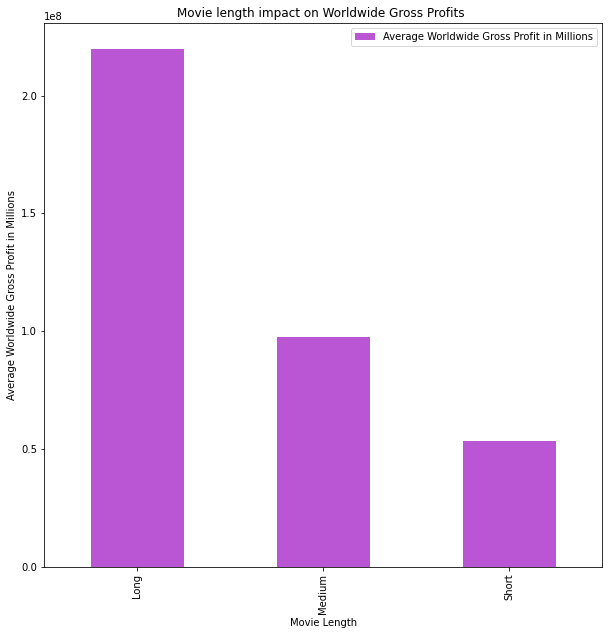

In [100]:
#Create Plot
ax=movie_length_pref.plot(kind='bar',figsize=(10,10),title="Movie length impact on Worldwide Gross Profits ",legend=True, color='mediumorchid')

#set titles for x-axis
ax.set_xlabel("Movie Length")
#set title for y-axis
ax.set_ylabel("Average Worldwide Gross Profit in Millions")
#placing the legend to avoid overlap
plt.legend(["Average Worldwide Gross Profit in Millions"],loc="upper right")


plt.show()

In [88]:
runtime_pref1=moviedf.groupby(['movie_length']).averagerating.mean().sort_values(ascending=False)
runtime_pref1

movie_length
Long     7
Medium   7
Short    6
Name: averagerating, dtype: float64

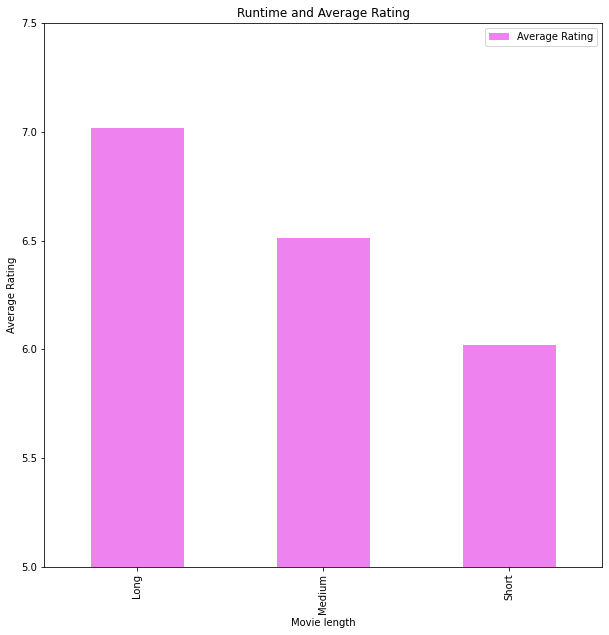

In [106]:
#Create Plot
ax=runtime_pref1.plot(kind='bar',figsize=(10,10),title="Runtime and Average Rating",legend=True,color='violet')

#set titles for x-axis
ax.set_xlabel("Movie length")
#set title for y-axis
ax.set_ylabel("Average Rating")
#placing the legend to avoid overlap
plt.legend(["Average Rating"],loc="upper right")
plt.ylim(5,7.5)

plt.show()

# Release months with highest gross profits and highest average ratings
Lets analyse to find the performance of the movies as per release months.

In [93]:
release_month=movie_analysis_df.groupby(['release_month']).GP_ww.mean().sort_values(ascending=False)
release_month

release_month
Jun   138572886
May   124880068
Nov   121819436
Jul   112080905
Mar    91688855
Dec    69566837
Feb    65177361
Apr    64990539
Jan    44393130
Aug    43152799
Oct    42702427
Sep    32486404
Name: GP_ww, dtype: float64

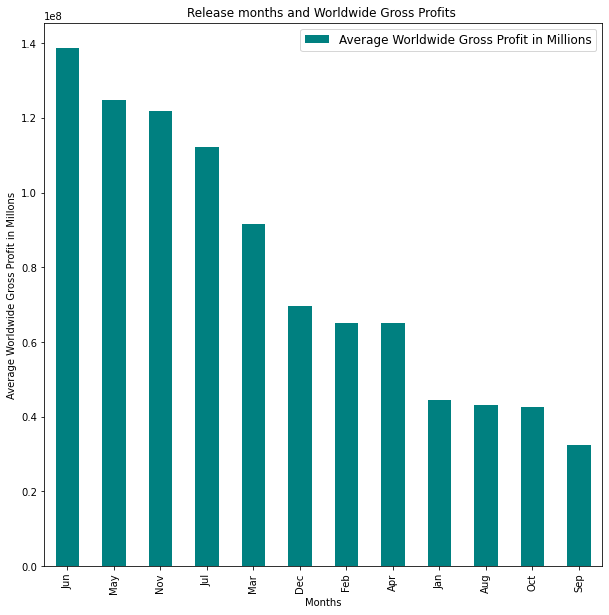

In [114]:
#Create Plot
ax=release_month.plot(kind='bar',figsize=(10,10),title="Release months vs Worldwide Gross Profits ",legend=True,color='teal')

#set titles for x-axis
ax.set_xlabel("Months")
#set title for y-axis
ax.set_ylabel("Average Worldwide Gross Profit in Millons")
#placing the legend to avoid overlap
plt.legend(["Average Worldwide Gross Profit in Millions"], loc=1, prop={'size': 12})


plt.show()

In [108]:
release_month1=movie_analysis_df.groupby(['release_month']).averagerating.mean().sort_values(ascending=False)
release_month1

release_month
Nov   7
Jun   6
May   6
Jul   6
Oct   6
Mar   6
Dec   6
Apr   6
Sep   6
Aug   6
Feb   6
Jan   6
Name: averagerating, dtype: float64

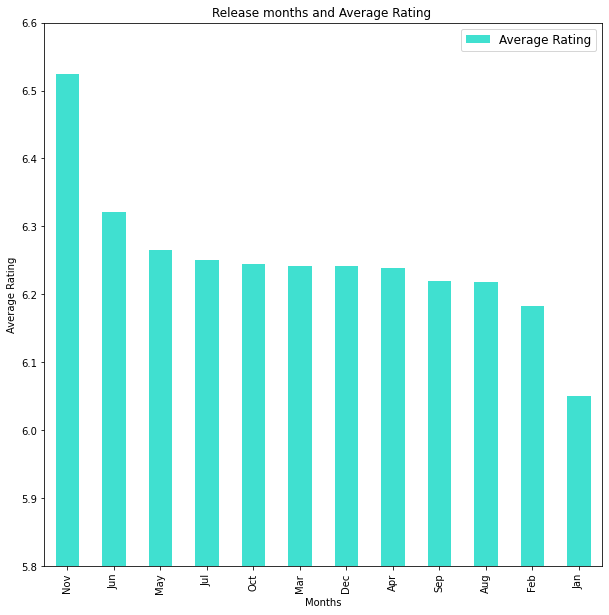

In [128]:
#Create Plot
ax=release_month1.plot(kind='bar',figsize=(10,10),title="Release months and Average Rating ",legend=True, color='turquoise')

#set titles for x-axis
ax.set_xlabel("Months")
#set title for y-axis
ax.set_ylabel("Average Rating")
#placing the legend to avoid overlap
plt.legend(["Average Rating"], loc=1, prop={'size': 12})
plt.ylim(5.8,6.6)

plt.show()

# Conclusions

This analysis leads to three recommendations for the new Movie Studio:

* What type of movie did people watch in the past years?

We can see that Animation, Adventure and Sci-fi are the Top 3 Movie Genres. The data shows the movies falling under these genres have made highest Gross Profit Collection worldwide. 


*Does movie-length have any impact on the audience?

We should look into creating movies with runtime of more than 139 mins. Movies with longer runtime have collected highest Gross Profits and earned highest average rating.


*When is the best time to release the movie to be successful?
We should look into the June, November and May months as the preferred time to release the movies. The data shows movies released in these months have collected highest Gross Profits and had highest average ratings.It could of any reason like good weather, holiday season, etc.


# Next Steps

Further analyses could yield additional insights for the business relating to type of movies to make and release.

We could use further analysis to find out the breakdown of genre trends year wise,information on the best directors and actors for the movies. We can also work on further analysis of the movie production budget and its impact on average ratings to check if it has any co-relation and impact.
